In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

/var/folders/p6/zn1thsjj39x22wz5h1vhtxlh0000gn/T/ipykernel_12754/602150531.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df=pd.read_csv('/Users/jeong-yula/Downloads/open/train.csv')

In [3]:
plt.rcParams['font.family'] = 'AppleGothic'

In [4]:
df.head()

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
0,TRAIN_00000,12480000,36 months,6 years,RENT,72000000,18.90,15,부채 통합,0,0,0.0,0.0,0.0,C
1,TRAIN_00001,14400000,60 months,10+ years,MORTGAGE,130800000,22.33,21,주택 개선,0,373572,234060.0,0.0,0.0,B
2,TRAIN_00002,12000000,36 months,5 years,MORTGAGE,96000000,8.60,14,부채 통합,0,928644,151944.0,0.0,0.0,A
3,TRAIN_00003,14400000,36 months,8 years,MORTGAGE,132000000,15.09,15,부채 통합,0,325824,153108.0,0.0,0.0,C
4,TRAIN_00004,18000000,60 months,Unknown,RENT,71736000,25.39,19,주요 구매,0,228540,148956.0,0.0,0.0,B


In [5]:
df[df['근로기간']=='Unknown'][['근로기간','연간소득']].sort_values('연간소득', ascending=False)

,근로기간,연간소득
31281,Unknown,952800000
75143,Unknown,780000000
85709,Unknown,648000000
50557,Unknown,476724000
80966,Unknown,448800000
...,...,...
6688,Unknown,6480000
81126,Unknown,6000000
62765,Unknown,2124000
29129,Unknown,1440000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96294 entries, 0 to 96293
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            96294 non-null  object 
 1   대출금액          96294 non-null  int64  
 2   대출기간          96294 non-null  object 
 3   근로기간          96294 non-null  object 
 4   주택소유상태        96294 non-null  object 
 5   연간소득          96294 non-null  int64  
 6   부채_대비_소득_비율   96294 non-null  float64
 7   총계좌수          96294 non-null  int64  
 8   대출목적          96294 non-null  object 
 9   최근_2년간_연체_횟수  96294 non-null  int64  
 10  총상환원금         96294 non-null  int64  
 11  총상환이자         96294 non-null  float64
 12  총연체금액         96294 non-null  float64
 13  연체계좌수         96294 non-null  float64
 14  대출등급          96294 non-null  object 
dtypes: float64(4), int64(5), object(6)
memory usage: 11.0+ MB


In [7]:
df.describe(include='all')

,ID,대출금액,대출기간,근로기간,주택소유상태,연간소득,부채_대비_소득_비율,총계좌수,대출목적,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,대출등급
count,96294,9.629400e+04,96294,96294,96294,9.629400e+04,96294.000000,96294.000000,96294,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294
unique,96294,NaN,2,16,4,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,7
top,TRAIN_00000,NaN,36 months,10+ years,MORTGAGE,NaN,NaN,NaN,부채 통합,NaN,NaN,NaN,NaN,NaN,B
freq,1,NaN,64479,31585,47934,NaN,NaN,NaN,55150,NaN,NaN,NaN,NaN,NaN,28817
mean,NaN,1.830400e+07,NaN,NaN,NaN,9.392672e+07,19.379590,25.304827,NaN,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,NaN
std,NaN,1.032908e+07,NaN,NaN,NaN,9.956871e+07,33.569559,12.088566,NaN,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,NaN
min,NaN,1.200000e+06,NaN,NaN,NaN,0.000000e+00,0.000000,4.000000,NaN,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,NaN
25%,NaN,1.020000e+07,NaN,NaN,NaN,5.760000e+07,12.650000,17.000000,NaN,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,NaN
50%,NaN,1.680000e+07,NaN,NaN,NaN,7.800000e+07,18.740000,24.000000,NaN,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,NaN
75%,NaN,2.400000e+07,NaN,NaN,NaN,1.128000e+08,25.540000,32.000000,NaN,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,NaN


총상환원금 총상환이자 총상환이자 연체계좌수 최근_2년간_연체_횟수 총계좌수 	부채_대비_소득_비율 연간소득 대출금액

In [ ]:
# sns.pairplot(data=df)

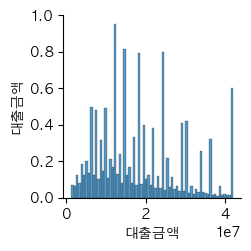

In [8]:
sns.pairplot(df[['대출금액','대출기간']])

In [9]:
df['근로기간'].unique()

array(['6 years', '10+ years', '5 years', '8 years', 'Unknown', '9 years',
       '2 years', '1 year', '3 years', '7 years', '4 years', '< 1 year',
       '10+years', '<1 year', '3', '1 years'], dtype=object)

In [10]:
df['근로기간'].value_counts()

근로기간
10+ years    31585
2 years       8450
< 1 year      7774
3 years       7581
1 year        6249
Unknown       5671
5 years       5665
4 years       5588
8 years       4888
6 years       3874
7 years       3814
9 years       3744
10+years       896
<1 year        370
3               89
1 years         56
Name: count, dtype: int64

In [11]:
df['연체계좌수'].describe()

count    96294.000000
mean         0.005805
std          0.079966
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          4.000000
Name: 연체계좌수, dtype: float64

In [12]:
loan_df=df.copy()

count    9.629400e+04
mean     9.392672e+07
std      9.956871e+07
min      0.000000e+00
25%      5.760000e+07
50%      7.800000e+07
75%      1.128000e+08
max      1.080000e+10
Name: 연간소득, dtype: float64

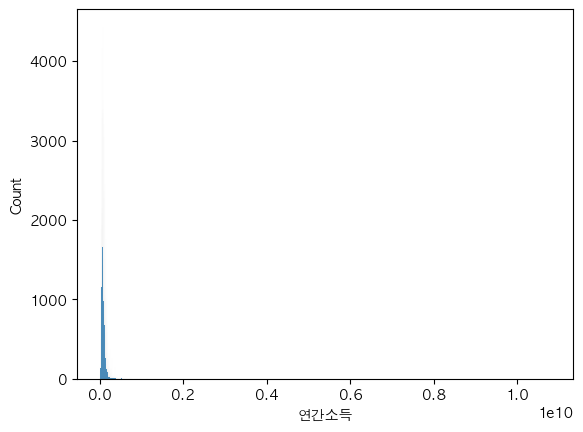

In [13]:
sns.histplot(data=loan_df, x='연간소득')
df['연간소득'].describe()

count    9.629400e+04
mean     1.830400e+07
std      1.032908e+07
min      1.200000e+06
25%      1.020000e+07
50%      1.680000e+07
75%      2.400000e+07
max      4.200000e+07
Name: 대출금액, dtype: float64

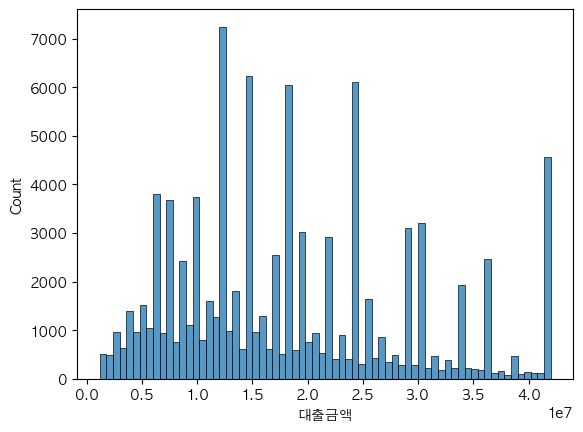

In [14]:
sns.histplot(data=loan_df, x='대출금액')
df['대출금액'].describe()

count    96294.000000
mean        19.379590
std         33.569559
min          0.000000
25%         12.650000
50%         18.740000
75%         25.540000
max       9999.000000
Name: 부채_대비_소득_비율, dtype: float64

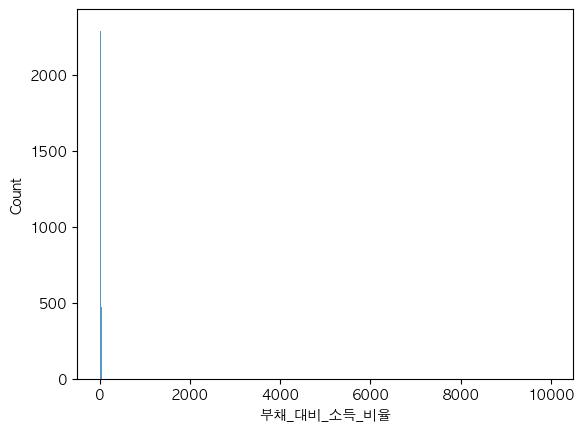

In [ ]:
sns.histplot(data=loan_df, x='부채_대비_소득_비율')
df['부채_대비_소득_비율'].describe()

count        96294
unique           4
top       MORTGAGE
freq         47934
Name: 주택소유상태, dtype: object

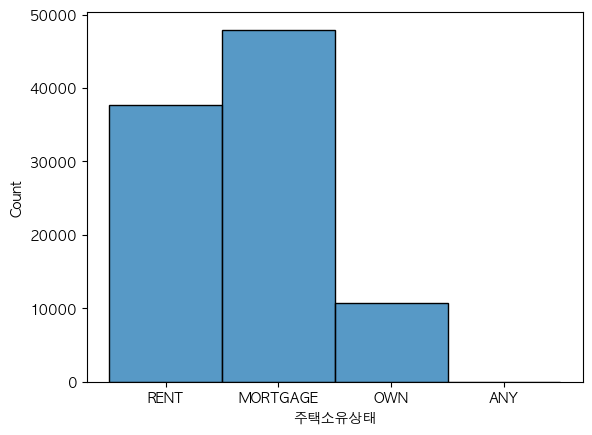

In [15]:
sns.histplot(data=loan_df, x='주택소유상태')
df['주택소유상태'].describe()

In [16]:
def get_work_period(x):
    if x in['< 1 year','<1 year']:
        return 0
    if x in['1 year','1 years']:
        return 1
    elif x=='2 years':
        return 2
    elif x=='3 years':
        return 3
    elif x=='4 years':
        return 4
    elif x=='5 years':
        return 5
    elif x=='6 years':
        return 6
    elif x=='7 years':
        return 7
    elif x=='8 years':
        return 8
    elif x=='9 years':
        return 9
    elif x in ['10+ years','10+years']:
        return 10
    else:
        return 3


loan_df['work_period']=loan_df['근로기간'].apply(get_work_period)


In [18]:
loan_df['work_period'].describe()

count    96294.000000
mean         5.830654
std          3.685715
min          0.000000
25%          3.000000
50%          6.000000
75%         10.000000
max         10.000000
Name: work_period, dtype: float64

<Axes: xlabel='work_period', ylabel='count'>

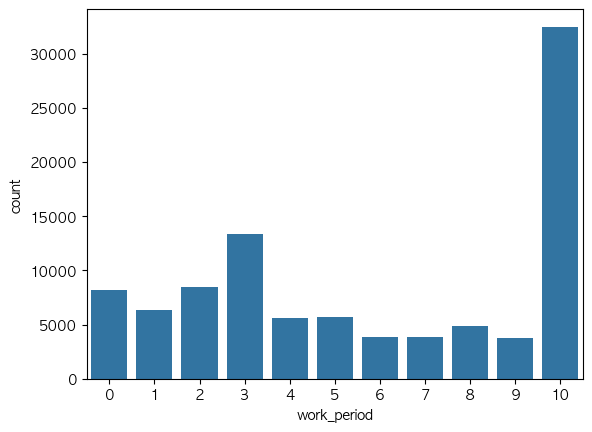

In [19]:
sns.countplot(data=loan_df, x='work_period')

In [20]:
loan_df['대출기간'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [21]:
def get_loan_period(x):
    if x==' 36 months':
        return 0
    else:
        return 1

loan_df['loan_period']=loan_df['대출기간'].apply(get_loan_period)

<Axes: xlabel='loan_period', ylabel='count'>

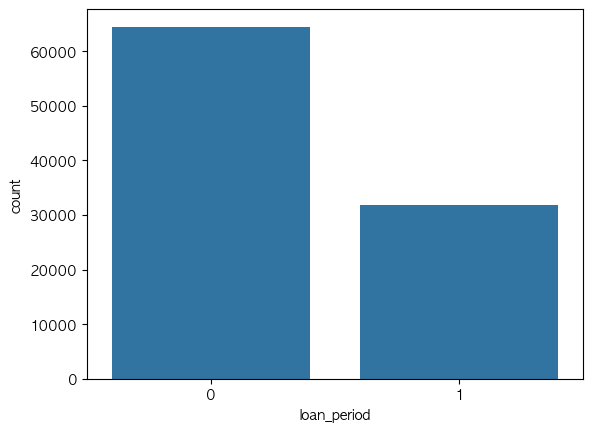

In [22]:
sns.countplot(data=loan_df,x='loan_period')

In [23]:
loan_df['대출등급'].unique()

array(['C', 'B', 'A', 'D', 'F', 'G', 'E'], dtype=object)

In [24]:
def get_loan_class(x):
    if x=='A':
        return 7
    elif x=='B':
        return 6
    elif x=='C':
        return 5
    elif x=='D':
        return 4
    elif x=='E':
        return 3
    elif x=='F':
        return 2
    else:
        return 1

loan_df['loan_class']=loan_df['대출등급'].apply(get_loan_class)

In [25]:
loan_df['loan_class'].describe()

count    96294.000000
mean         5.277868
std          1.270961
min          1.000000
25%          5.000000
50%          5.000000
75%          6.000000
max          7.000000
Name: loan_class, dtype: float64

In [ ]:
from sklearn.linear_model import LinearRegression
model_lr=LinearRegression()
type(model_lr)

sklearn.linear_model._base.LinearRegression

In [ ]:
X=loan_df[['loan_period']]
y=loan_df[['loan_class']]

In [ ]:
model_lr.fit(X=X,y=y)

LinearRegression()

In [ ]:
w1=model_lr.coef_[0][0]
w1

-1.1993034701029872

In [ ]:
w0=model_lr.intercept_[0]


In [ ]:
print('y={}x+{}'.format(w1.round(2),w0.round(2)))


y=-1.2x+5.67


In [29]:
corr_df=loan_df[['loan_class','loan_period','work_period']]
corr_df.corr()

,loan_class,loan_period,work_period
loan_class,1.000000,-0.443839,0.017862
loan_period,-0.443839,1.000000,0.063497
work_period,0.017862,0.063497,1.000000


총상환원금 총상환이자 총상환이자 연체계좌수 최근_2년간_연체_횟수 총계좌수 	부채_대비_소득_비율 연간소득 대출금액

In [42]:
loan_df['원금상환률']=(loan_df['총상환원금']/loan_df['대출금액'])*100
loan_df['이자상환률']=(loan_df['총상환이자']/loan_df['대출금액'])*100
loan_df.describe()

,대출금액,연간소득,부채_대비_소득_비율,총계좌수,최근_2년간_연체_횟수,총상환원금,총상환이자,총연체금액,연체계좌수,work_period,loan_period,loan_class,원금상환률,이자상환률
count,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,9.629400e+04,9.629400e+04,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000,96294.000000
mean,1.830400e+07,9.392672e+07,19.379590,25.304827,0.345681,8.225035e+05,4.282282e+05,54.380584,0.005805,5.830654,0.330394,5.277868,4.784136,2.256612
std,1.032908e+07,9.956871e+07,33.569559,12.088566,0.919119,1.027745e+06,4.402111e+05,1414.769218,0.079966,3.685715,0.470358,1.270961,4.785364,1.554897
min,1.200000e+06,0.000000e+00,0.000000,4.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.020000e+07,5.760000e+07,12.650000,17.000000,0.000000,3.075720e+05,1.346160e+05,0.000000,0.000000,3.000000,0.000000,5.000000,2.349313,1.084136
50%,1.680000e+07,7.800000e+07,18.740000,24.000000,0.000000,5.976960e+05,2.870040e+05,0.000000,0.000000,6.000000,0.000000,5.000000,4.367333,1.949167
75%,2.400000e+07,1.128000e+08,25.540000,32.000000,0.000000,1.055076e+06,5.702160e+05,0.000000,0.000000,10.000000,1.000000,6.000000,6.964000,3.098750
max,4.200000e+07,1.080000e+10,9999.000000,169.000000,30.000000,4.195594e+07,5.653416e+06,75768.000000,4.000000,10.000000,1.000000,7.000000,100.000000,18.146637


In [ ]:
df['부채대비']

In [43]:
corr_df=loan_df[['loan_class','loan_period','work_period','총상환원금','총상환이자','연체계좌수','최근_2년간_연체_횟수','총계좌수','부채_대비_소득_비율','연간소득','대출금액','원금상환률','이자상환률']]
corr_matrix=corr_df.corr()
corr_matrix

,loan_class,loan_period,work_period,총상환원금,총상환이자,연체계좌수,최근_2년간_연체_횟수,총계좌수,부채_대비_소득_비율,연간소득,대출금액,원금상환률,이자상환률
loan_class,1.000000,-0.443839,0.017862,0.101515,-0.444245,-0.025681,-0.039786,0.039991,-0.054121,0.083666,-0.137049,0.163386,-0.516731
loan_period,-0.443839,1.000000,0.063497,-0.090007,0.412330,0.006988,-0.013857,0.105956,0.030263,0.038396,0.402573,-0.282240,0.252218
work_period,0.017862,0.063497,1.000000,0.030900,0.060103,0.002842,0.020408,0.093983,0.006273,0.069072,0.100889,-0.019079,0.001010
총상환원금,0.101515,-0.090007,0.030900,1.000000,0.412385,-0.005190,-0.010048,0.083615,-0.016180,0.137552,0.379061,0.749349,0.256298
총상환이자,-0.444245,0.412330,0.060103,0.412385,1.000000,0.009257,0.008095,0.116299,0.018565,0.114311,0.615680,0.102983,0.748677
연체계좌수,-0.025681,0.006988,0.002842,-0.005190,0.009257,1.000000,0.133632,0.023652,0.000051,0.009854,0.000182,-0.005186,0.013790
최근_2년간_연체_횟수,-0.039786,-0.013857,0.020408,-0.010048,0.008095,0.133632,1.000000,0.112092,0.000699,0.040260,-0.014775,-0.000879,0.017599
총계좌수,0.039991,0.105956,0.093983,0.083615,0.116299,0.023652,0.112092,1.000000,0.058830,0.145403,0.212309,-0.019253,-0.009467
부채_대비_소득_비율,-0.054121,0.030263,0.006273,-0.016180,0.018565,0.000051,0.000699,0.058830,1.000000,-0.044594,0.002263,-0.020174,0.025273
연간소득,0.083666,0.038396,0.069072,0.137552,0.114311,0.009854,0.040260,0.145403,-0.044594,1.000000,0.273975,0.009883,-0.045651


/Users/jeong-yula/Library/Python/3.9/lib/python/site-packages/seaborn/utils.py:61: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/jeong-yula/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


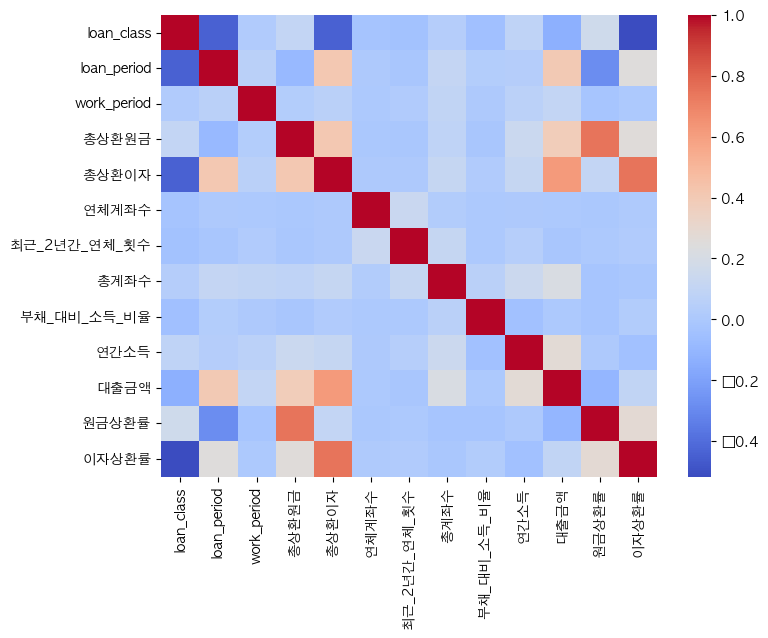

In [50]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap='coolwarm',fmt=".2fm")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [72]:
X=loan_df.copy()

In [ ]:
X=X.drop('ID',axis=1)
X=X.drop('대출기간',axis=1)
X=X.drop('근로기간',axis=1)
X=X.drop('주택소유상태',axis=1)
X=X.drop('대출목적',axis=1)


In [85]:
X=X.drop('대출등급',axis=1)

count    96294.000000
mean         4.784136
std          4.785364
min          0.000000
25%          2.349313
50%          4.367333
75%          6.964000
max        100.000000
Name: 원금상환률, dtype: float64

In [83]:
y=loan_df[['loan_class']]

In [87]:
loan_dtc=DecisionTreeClassifier(random_state=20)
loan_dtc.fit(X,y)

DecisionTreeClassifier(random_state=20)

In [88]:
print("훈련 세트 정확도: {:.3f}".format(loan_dtc.score(X, y)))

훈련 세트 정확도: 1.000
